# JUPYTER NOTEBOOK FOR HOMEWORK 1
PART 1 - Sharpen a blurred colored image using a Gaussian filter

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import cv2
import scipy.misc as sm
from scipy.ndimage.filters import convolve
from skimage.color import lab2rgb

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#Create a Gaussian filter of n x n size and width sigma
def gaussian_filter(n, sigma=1):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    return g
 

#draw a circular patch on a color image Img; the patch is centered at r,c, with radius rad
#and color col (0-black; 1-red; 2-cyan; 3-green)
#Note that this function directly modifies Img. 
def draw_patch(Img, r, c, rad=7,col=1):  
    
    if col == 2:
        p = [0,1.0,1.0] #cyan
    if col == 1: 
        print('color: red')
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
    else:
        p = [0,1.0,0.0] #green
        
    rr, cc = skimage.draw.circle(r, c, rad)
    Img[rr,cc, 0:3]= p       

        

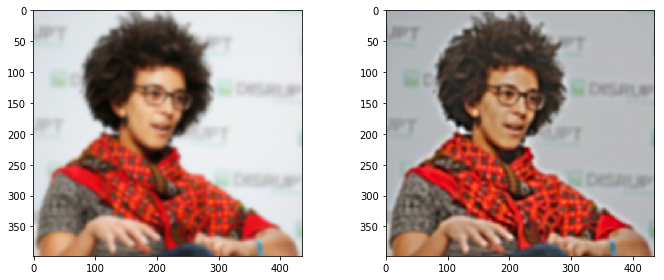

In [16]:
#1. Load your image of choice.
img = load_img('images/timnit_blur.jpg')

#2. Create a Gaussian filter here
'****Put your code here.'
g = gaussian_filter(50, 5)

#3. Next, convert your image to L.a.b. color scale
lab = skimage.color.rgb2lab(img)

#4. Extract the first channel to get the intensity-only image. Say this results in L
'****Put your code here.'
L, a, b = cv2.split(lab)

#5. Convolve this new image L with the filter g to get a smoothed image Simg
'****Put your code here.'
Simg = convolve(L, g)
               
#6. Create a new image by multiplying L by a small constant r and Simg by another small constant s
newL = 0.5*L - 0.3*Simg
min_val = newL.min()
max_val = newL.max()
lb = 0
ub = 100

#7. Normalize your new image so that its values are between 0 and 100
'****Put your code here.'
newL = (lb + (newL-min_val)*(ub-lb))/(max_val-min_val)

#8. Recombine this new L image with the previous a and b channels of the lab image in step #3.
'****Put your code here.'
lab2 = cv2.merge((newL, a, b))

#9. Reconvert the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = skimage.color.lab2rgb(lab2)

#10. Examine your newly sharpened image and save it to file. Also display the original and sharpened image side-by-side
f, axarr = plt.subplots(1,2, figsize=(10,4))
ax = axarr.ravel()
ax[0].imshow(img)
ax[1].imshow(img2)
f.tight_layout()
plt.show()

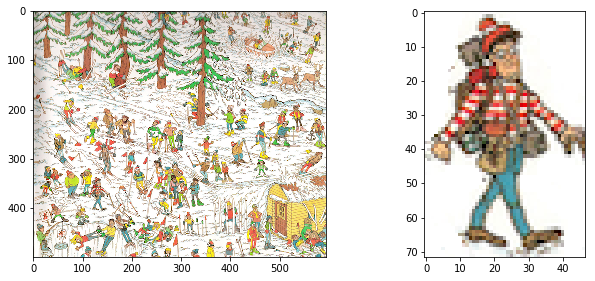

In [17]:
#1. Load the image and Waldo template
img1 = load_img('images/waldo_onIce.png')
temp1 = load_img('images/waldo_template.png')

#Convert the two images to grayscale
img = skimage.color.rgb2gray(img1)
temp = skimage.color.rgb2gray(temp1)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

coordinates: (371.0, 132.5)


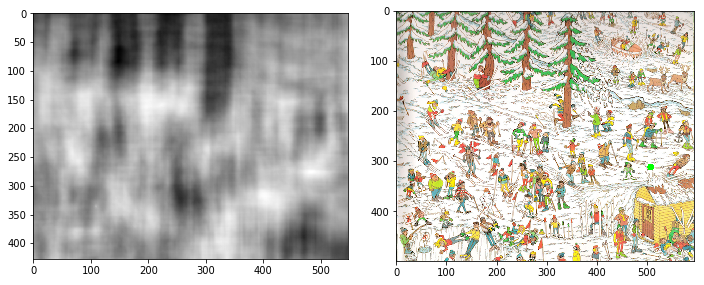

In [18]:
#2. Write and call a cross-correlation function to find the best match for Waldo
def crosscorr(Img, f):
    '****Put your code here.'
    image_Map = []
    img_length, img_breadth = Img.shape
    f_length, f_breadth = f.shape
    max_intensity = 0
    max_x, max_y = 0, 0
    pixel_row = []
    
    for i in range(0, img_length-f_length):
        for j in range(0, img_breadth-f_breadth):
            # cross correlation between template and normalized image
            intensity = np.sum(f * Img[i:f_length+i, j:f_breadth+j])
            pixel_row.append(intensity)
            # find pixel with maximum intensity
            if intensity > max_intensity:
                max_intensity = intensity
                max_x, max_y = i, j
        image_Map.append(pixel_row)
        pixel_row = []
    # transform the detected coordinates from corner to center
    # return image map and coordinates
    return [image_Map, max_x+(f_length/2), max_y+(f_breadth/2)]
    
img_map = crosscorr(img,temp)
print('coordinates:', (x,y))
#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 
# 
'****Put your code here.'
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img_map[0], cmap = "gray")
draw_patch(img1, img_map[1], img_map[2], rad=7, col=2)
ax[1].imshow(img1)
fig.tight_layout()
plt.show()

coordinates: (371.0, 132.5)


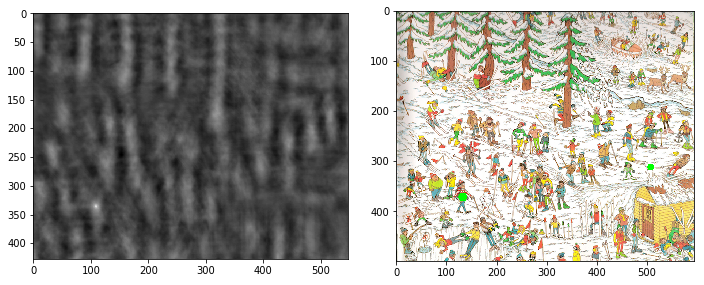

In [19]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    '****Put your code here.'
    # Normalize image and template
    norm_img = (Img - np.mean(Img)) / np.sqrt(np.sum(np.square(Img - np.mean(Img))))
    norm_f = (f - np.mean(f)) / np.sqrt(np.sum(np.square(f - np.mean(f))))
    image_Map = []
    img_length, img_breadth = norm_img.shape
    f_length, f_breadth = norm_f.shape
    max_intensity = 0
    max_x, max_y = 0, 0
    pixel_row = []
    
    for i in range(0, img_length-f_length):
        for j in range(0, img_breadth-f_breadth):
            # cross correlation between template and normalized image
            intensity = np.sum(norm_f * norm_img[i:f_length+i, j:f_breadth+j])
            pixel_row.append(intensity)
            # find pixel with maximum intensity
            if intensity > max_intensity:
                max_intensity = intensity
                max_x = i
                max_y = j
        image_Map.append(pixel_row)
        pixel_row = []
    # transform the detected coordinates from corner to center
    # return image map and coordinates
    return [image_Map, max_x+(f_length/2), max_y+(f_breadth/2)]
    
    
img_map = normcrosscorr(img,temp)
print('coordinates:', (x,y))
#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 
# 
'****Put your code here.'
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img_map[0], cmap = "gray")
draw_patch(img1, img_map[1], img_map[2], rad=9, col=5)
ax[1].imshow(img1)
fig.tight_layout()
plt.show()

coordinates: (371.0, 132.5)


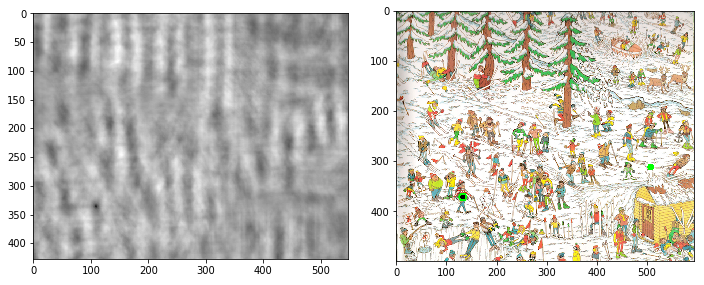

In [20]:
#6. Write and call an SSD function to find the best match for Waldo
def SSD(Img, f):
    '****Put your code here.'
    image_Map = []
    img_length, img_breadth = Img.shape
    f_length, f_breadth = f.shape
    min_intensity = 255
    min_x, min_y = 0, 0
    pixel_row = []
    
    for i in range(0, img_length-f_length):
        for j in range(0, img_breadth-f_breadth):
            # sum of squared difference
            intensity = np.sum(np.square(Img[i:f_length+i, j:f_breadth+j] - f))
            pixel_row.append(intensity)
            # find pixel value with minimum intensity
            if intensity < min_intensity:
                min_intensity = intensity
                min_x, min_y = i, j
        image_Map.append(pixel_row)
        pixel_row = []
    # transform the detected coordinates from corner to center
    # return image map and coordinates
    return [image_Map, min_x+(f_length/2), min_y+(f_breadth/2)]
    
img_map = SSD(img,temp)
print('coordinates:', (x,y))
#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 
# 
'****Put your code here.'
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img_map[0], cmap = "gray")
draw_patch(img1, img_map[1], img_map[2], rad=5, col=0)
ax[1].imshow(img1)
fig.tight_layout()
plt.show()